# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load up/clean data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df1 = df[['OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd','ExterCond',
     'Foundation','BsmtCond','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath',
     'BedroomAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','SalePrice']]

df1.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,Foundation,BsmtCond,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,5,2003,2003,TA,PConc,TA,856,856,1710,2,3,8,2003.0,2,548,208500
1,6,8,1976,1976,TA,CBlock,TA,1262,1262,1262,2,3,6,1976.0,2,460,181500
2,7,5,2001,2002,TA,PConc,TA,920,920,1786,2,3,6,2001.0,2,608,223500
3,7,5,1915,1970,TA,BrkTil,Gd,756,961,1717,1,3,7,1998.0,3,642,140000
4,8,5,2000,2000,TA,PConc,TA,1145,1145,2198,2,4,9,2000.0,3,836,250000


In [4]:
df1['ExterCond']= df1['ExterCond'].map({'TA':2, 'Gd':3, 'Fa':1, 'Po':0, 'Ex':4})
df1['Foundation']= df1['Foundation'].map({'PConc':5, 'CBlock':2, 'BrkTil':1, 'Wood':0, 'Slab':4, 'Stone':3})
df1['BsmtCond']= df1['BsmtCond'].map({'TA':2, 'Gd':3, 'Fa':1, 'Po':0, 'Ex':4})
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(0) #No Garage
df1['BsmtCond'] = df1['BsmtCond'].fillna(df1['BsmtCond'].mean())

df1.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,Foundation,BsmtCond,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,5,2003,2003,2,5,2.0,856,856,1710,2,3,8,2003.0,2,548,208500
1,6,8,1976,1976,2,2,2.0,1262,1262,1262,2,3,6,1976.0,2,460,181500
2,7,5,2001,2002,2,5,2.0,920,920,1786,2,3,6,2001.0,2,608,223500
3,7,5,1915,1970,2,1,3.0,756,961,1717,1,3,7,1998.0,3,642,140000
4,8,5,2000,2000,2,5,2.0,1145,1145,2198,2,4,9,2000.0,3,836,250000


## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


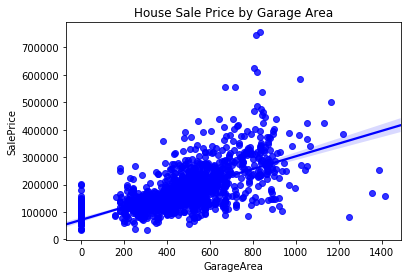

In [6]:
fig = sns.regplot(df1['GarageArea'], df1['SalePrice'], color='blue').set_title('House Sale Price by Garage Area')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [9]:
X = df1.drop('SalePrice', axis=1)

y = df1['SalePrice']

In [10]:
# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     333.6
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:21:21   Log-Likelihood:                -17414.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1443   BIC:                         3.495e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.119e+05   1.43e+05     -6.399   

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
#P-Values for YearRemodAdd, ExterCond, & BsmtCond are pretty high 
#which translates to them possibly not having much correlation
#with SalePrice.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [11]:
print(df1.shape)

df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

print(df1.shape)

(1460, 17)
(1197, 17)


In [12]:
X = df1.drop('SalePrice', axis=1)

y = df1['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# P-Value's got much smaller for most variables, 
#but went up significantly for TotRmsAbvGrd.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     384.4
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:33:31   Log-Likelihood:                -13858.
No. Observations:                1197   AIC:                         2.775e+04
Df Residuals:                    1180   BIC:                         2.784e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.081e+06   1.35e+06     -5.988   

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

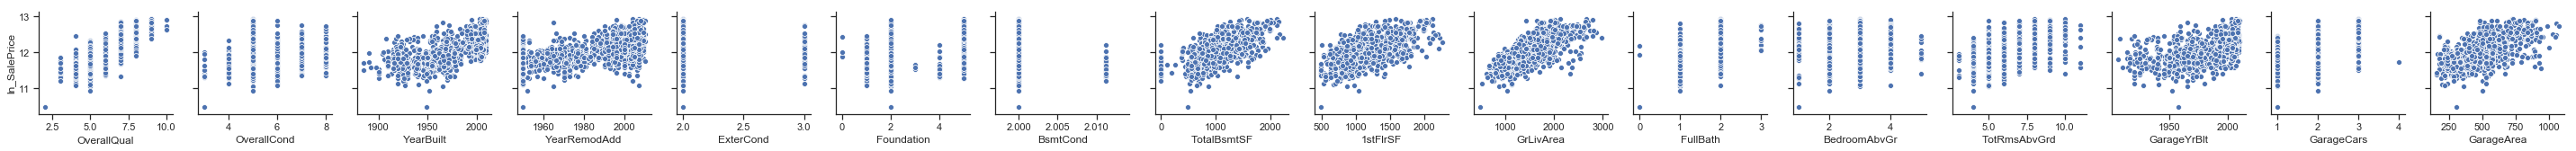

In [35]:
df1['ln_SalePrice'] = np.log(df1['SalePrice'])

sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df1.columns.drop(['SalePrice','ln_SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df1, y_vars=['ln_SalePrice'], x_vars=x_columns)

In [36]:
# Log-Linear Regression
X = df1.drop(columns = ['SalePrice','ln_SalePrice'],axis=1)

y = df1['ln_SalePrice']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#P-Value shot up for 1stFlrSF and is pretty high for BedroomAbvGr
#and TotRmsAbvGrd

#Coef's & stderr's are closer to 0 

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     453.5
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:36:29   Log-Likelihood:                 753.86
No. Observations:                1197   AIC:                            -1474.
Df Residuals:                    1180   BIC:                            -1387.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.7953      6.741     -1.305   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#The only variable with VIF > 10 is const

Index(['const', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object') 


[3227457.0467096926, 2.8406953438134135, 1.745414972729512, 5.219412446180994, 2.675583471094015, 1.1269765782292924, 2.4813755756217852, 2.1889586365266465, 6.450663788755135, 5.334385632852489, 4.490594271508101, 2.378636556371479, 2.185811354567757, 3.886519410676607, 5.026093260310816, 4.057592939521188, 3.807108906069838]


In [38]:
no_const = X.drop('const', axis=1)
no_const.corr()

#There are a couple variables with a slightly higher correlation

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,Foundation,BsmtCond,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
OverallQual,1.000000,-0.213347,0.621891,0.551919,-0.128271,0.543423,-0.215426,0.497010,0.410442,0.567172,0.573785,0.093975,0.394190,0.570616,0.569032,0.503366
OverallCond,-0.213347,1.000000,-0.448158,-0.022984,0.304949,-0.396347,-0.082432,-0.164291,-0.128178,-0.146657,-0.284517,0.003659,-0.093207,-0.383914,-0.294312,-0.240584
YearBuilt,0.621891,-0.448158,1.000000,0.655071,-0.196715,0.708381,-0.085477,0.374450,0.247126,0.253142,0.541027,-0.036593,0.128879,0.848796,0.561426,0.483278
YearRemodAdd,0.551919,-0.022984,0.655071,1.000000,-0.052702,0.578763,-0.137730,0.293053,0.224167,0.274688,0.458004,-0.070418,0.155166,0.677609,0.446637,0.380760
ExterCond,-0.128271,0.304949,-0.196715,-0.052702,1.000000,-0.168127,-0.024142,-0.043574,-0.010817,-0.042954,-0.079084,0.037494,-0.026553,-0.161015,-0.153653,-0.095488
Foundation,0.543423,-0.396347,0.708381,0.578763,-0.168127,1.000000,0.014325,0.231572,0.159897,0.286886,0.502796,-0.032888,0.183624,0.695749,0.483306,0.403233
BsmtCond,-0.215426,-0.082432,-0.085477,-0.137730,-0.024142,0.014325,1.000000,-0.421393,-0.009194,-0.070056,0.018815,-0.020653,-0.016005,-0.086774,-0.035429,-0.038741
TotalBsmtSF,0.497010,-0.164291,0.374450,0.293053,-0.043574,0.231572,-0.421393,1.000000,0.796604,0.330546,0.282362,0.014655,0.183701,0.306862,0.427008,0.444246
1stFlrSF,0.410442,-0.128178,0.247126,0.224167,-0.010817,0.159897,-0.009194,0.796604,1.000000,0.449020,0.329872,0.096515,0.312939,0.207549,0.423715,0.451029
GrLivArea,0.567172,-0.146657,0.253142,0.274688,-0.042954,0.286886,-0.070056,0.330546,0.449020,1.000000,0.616563,0.544268,0.807915,0.245127,0.468019,0.431811


## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [39]:
X.corr()

,const,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,Foundation,BsmtCond,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,1.000000,-0.213347,0.621891,0.551919,-0.128271,0.543423,-0.215426,0.497010,0.410442,0.567172,0.573785,0.093975,0.394190,0.570616,0.569032,0.503366
OverallCond,NaN,-0.213347,1.000000,-0.448158,-0.022984,0.304949,-0.396347,-0.082432,-0.164291,-0.128178,-0.146657,-0.284517,0.003659,-0.093207,-0.383914,-0.294312,-0.240584
YearBuilt,NaN,0.621891,-0.448158,1.000000,0.655071,-0.196715,0.708381,-0.085477,0.374450,0.247126,0.253142,0.541027,-0.036593,0.128879,0.848796,0.561426,0.483278
YearRemodAdd,NaN,0.551919,-0.022984,0.655071,1.000000,-0.052702,0.578763,-0.137730,0.293053,0.224167,0.274688,0.458004,-0.070418,0.155166,0.677609,0.446637,0.380760
ExterCond,NaN,-0.128271,0.304949,-0.196715,-0.052702,1.000000,-0.168127,-0.024142,-0.043574,-0.010817,-0.042954,-0.079084,0.037494,-0.026553,-0.161015,-0.153653,-0.095488
Foundation,NaN,0.543423,-0.396347,0.708381,0.578763,-0.168127,1.000000,0.014325,0.231572,0.159897,0.286886,0.502796,-0.032888,0.183624,0.695749,0.483306,0.403233
BsmtCond,NaN,-0.215426,-0.082432,-0.085477,-0.137730,-0.024142,0.014325,1.000000,-0.421393,-0.009194,-0.070056,0.018815,-0.020653,-0.016005,-0.086774,-0.035429,-0.038741
TotalBsmtSF,NaN,0.497010,-0.164291,0.374450,0.293053,-0.043574,0.231572,-0.421393,1.000000,0.796604,0.330546,0.282362,0.014655,0.183701,0.306862,0.427008,0.444246
1stFlrSF,NaN,0.410442,-0.128178,0.247126,0.224167,-0.010817,0.159897,-0.009194,0.796604,1.000000,0.449020,0.329872,0.096515,0.312939,0.207549,0.423715,0.451029


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [43]:
#Dropping GarageYrBlt since it is pretty highly correlated with YearBuilt
#Dropping TotRmsAbvGrd which is highly correlated with GrLivArea
#Dropping GarageArea which is highly correlated with GarageCars
#Dropping 1stFlrSF which is highly correlated with TotalBsmtSF
#TotalBsmtSF will tell us if it has a basement


X = X.drop(columns = ['GarageYrBlt','TotRmsAbvGrd','GarageArea','1stFlrSF'])

y = df1['ln_SalePrice']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#Std Err is close to 0 for all but const & BsmtCond
#P-Value is still pretty large for BedroomAbvGr

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     598.4
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:43:17   Log-Likelihood:                 746.76
No. Observations:                1197   AIC:                            -1468.
Df Residuals:                    1184   BIC:                            -1401.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.2783      5.309     -2.313   

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [44]:
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#Std Err actually went up slightly on majority of variables from 2.3

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     532.0
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                 746.76
No. Observations:                1197   AIC:                            -1468.
Df Residuals:                    1184   BIC:                            -1401.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.2783      5.557     -2.210   

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

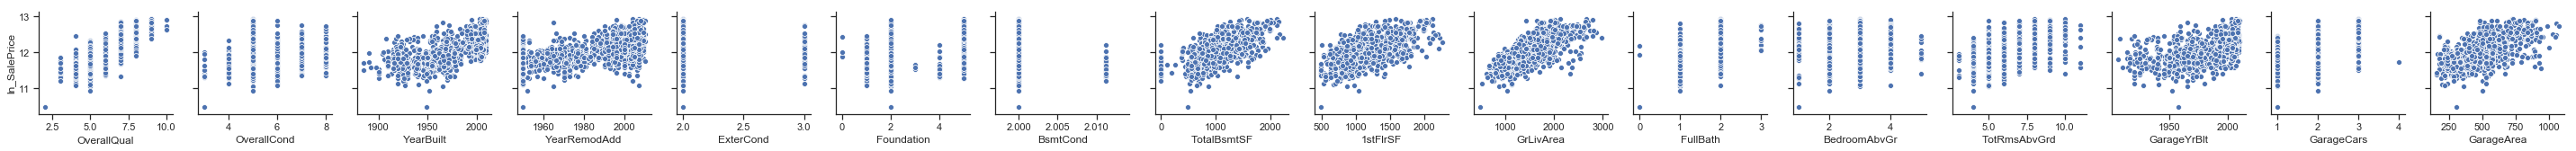

In [47]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df1.columns.drop(['SalePrice', 'ln_SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df1, y_vars=['ln_SalePrice'], x_vars=x_columns)

#OverallQual, 1stFlrSF, GrLivArea

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


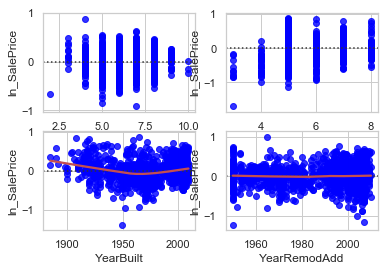

In [48]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(df1['OverallQual'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df1['OverallCond'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df1['YearBuilt'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df1['YearRemodAdd'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


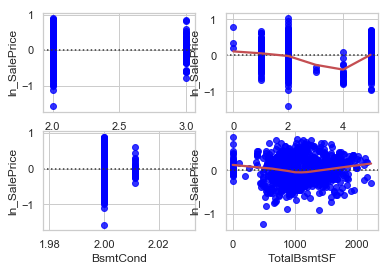

In [49]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(df1['ExterCond'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df1['Foundation'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df1['BsmtCond'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df1['TotalBsmtSF'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

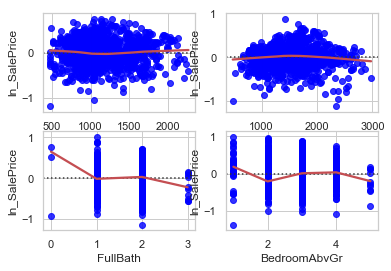

In [50]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(df1['1stFlrSF'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df1['GrLivArea'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df1['FullBath'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df1['BedroomAbvGr'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


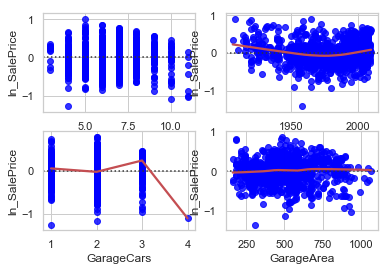

In [51]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(df1['TotRmsAbvGrd'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df1['GarageYrBlt'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df1['GarageCars'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df1['GarageArea'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

#From resid plots, looks like GrLivArea and maybe GarageArea are good candidates

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [52]:
df1['GrLivArea_squared'] = df1['GrLivArea']**2
df1['GarageArea_squared'] = df1['GarageArea']**2

In [53]:
X = df1.drop(columns=['SalePrice','ln_SalePrice']) 

y = df1['ln_SalePrice']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#This model is definitely better than the very first that I ran, 
#but this is including variables that should probably be taken out.

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.53e-229
Time:                        16:01:55   Log-Likelihood:                 757.39
No. Observations:                1197   AIC:                            -1477.
Df Residuals:                    1178   BIC:                            -1380.
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.5435      7

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 16
  'rank is %d' % (J, J_), ValueWarning)
